# Preprocesamiento Imágenes

En esta sección se definen y aplican las transformaciones necesarias para preparar las imágenes antes de su uso para el entrenamiento del modelo.

Para esta primera fase se realizará un redimensionado a 224x224 píxeles y un recorte central (CenterCrop) para evitar deformaciones, siguiendo los requisitos de entrada de ResNet18. 

Además, se normalizarán los valores de los píxeles con las medias y desviaciones estándar de ImageNet, lo que permite aprovechar el entrenamiento previo (transfer learning) de la red.

In [1]:
# Instalación e importación de librerías
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms

print("NumPy      :", np.__version__)
print("Pandas     :", pd.__version__)
print("PyTorch    :", torch.__version__)
import torchvision
print("TorchVision:", torchvision.__version__)


NumPy      : 1.26.4
Pandas     : 2.3.1
PyTorch    : 2.2.2
TorchVision: 0.17.2


In [2]:
# Carga del dataset
df = pd.read_csv("../full_df.csv")

# Ruta de las imágenes
image_dir = "../ODIR-5K/ODIR-5K/Training Images"

# Construir lista de rutas completas
image_paths = df['filename'].apply(lambda x: os.path.join(image_dir, x)).tolist()

In [3]:
# Preprocesado inicial para ResNet18:
transform_img = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std =[0.229, 0.224, 0.225]
    )
])

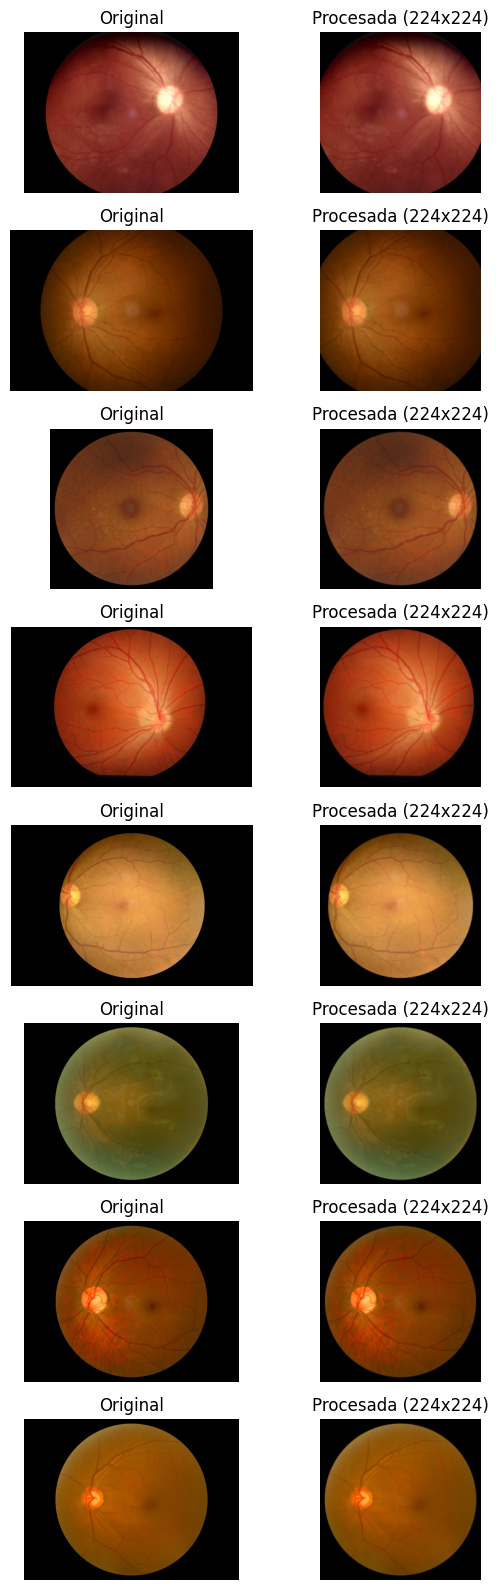

In [5]:
# Función para mostrar imágenes antes y después del preprocesado
def show_before_after(df, image_dir, transform, n=5):
    """
    Muestra n imágenes originales y procesadas una al lado de la otra.
    df: DataFrame con columna 'filename'
    image_dir: ruta base de las imágenes
    transform: transformación a aplicar
    n: número de imágenes a mostrar
    """
    # Elegir imágenes aleatorias del DataFrame
    sample_df = df.sample(n=min(n, len(df)), random_state=42)

    plt.figure(figsize=(6, 2 * len(sample_df)))
    for i, fname in enumerate(sample_df['filename']):
        path = os.path.join(image_dir, fname)

        # Abrir imagen original
        img = Image.open(path).convert("RGB")

        # Aplicar transformación
        img_transformed = transform(img)

        # Desnormalizar para mostrar correctamente los colores
        img_transformed = img_transformed.permute(1, 2, 0).numpy()
        img_transformed = img_transformed * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
        img_transformed = img_transformed.clip(0, 1)

        # Mostrar original
        plt.subplot(n, 2, 2*i + 1)
        plt.imshow(img)
        plt.title("Original")
        plt.axis("off")

        # Mostrar procesada
        plt.subplot(n, 2, 2*i + 2)
        plt.imshow(img_transformed)
        plt.title("Procesada (224x224)")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Ejemplo de uso:
show_before_after(df, image_dir, transform_img, n=8)
